In [42]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [102]:
class airbnb_city:
    
    def __init__(self, csv):
        
        self.csv = csv
                
        self.df_city = pd.read_csv(self.csv)
        
        print("Instance created!")
        
    def clean_columns(self):
        
        # Take only the relevant columns in the dataframe
        
        l_relevant_columns = ["host_is_superhost","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type","room_type","accommodates","bathrooms_text","beds","price","minimum_nights","maximum_nights","availability_30","availability_365","number_of_reviews","instant_bookable", "amenities", "host_verifications"]

        self.df_city = self.df_city[l_relevant_columns]
        
        self.df_city["bathrooms_text"].replace(np.nan, "?", inplace = True)
        
        # Get numbers out of bathroom_text columns
        
        l_nums = [re.findall(r'\d+',i) for i in self.df_city["bathrooms_text"].values]

        l_nums_completed = []

        for i in l_nums:

            if len(i) > 1:

                l_nums_completed.append('.'.join(i))

            elif len(i) == 0:

                l_nums_completed.append('0')

            else:

                l_nums_completed.append(i[0])

        # Separate categories from bathroom_text
        
        l_category = []

        for i in self.df_city["bathrooms_text"].values:

            if "shared" in i:

                l_category.append("Shared")

            elif "private" in i:

                l_category.append("Private")

            else:

                l_category.append("Unknown")
                
        # Create two different columns replacing bathroom_text
        
        self.df_city.drop("bathrooms_text", axis = 1, inplace = True)
                
        self.df_city["num_of_baths"] = l_nums_completed
        
        self.df_city["bath_category"] = l_category
        
        self.df_city["num_of_baths"] = self.df_city["num_of_baths"].astype("float64")

        # Column["prices"]
        
        self.df_city["price"]  = self.df_city["price"] .apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x)
        
        self.df_city["amenities"] = [len(i) for i in self.df_city["amenities"]]

        self.df_city["host_verifications"] = [len(i) for i in self.df_city["host_verifications"]]
        
        
        print("Dataframe sucessfully created!")
    
    def label_encoding(self):
        
        self.df_city.dropna(inplace=True)
        
        # Encoding columns with dummies function
        
        def dummies(data, column):
            return pd.get_dummies(data = data[column], drop_first=True)
        
        self.df_city["host_is_superhost"] = dummies(self.df_city, "host_is_superhost")
        self.df_city["instant_bookable"] = dummies(self.df_city, "instant_bookable")
        
        df_room_type = dummies(self.df_city, "room_type")
        df_bath_category = dummies(self.df_city, "bath_category")
        df_bath_category = df_bath_category.rename(columns={'Shared': 'shared_bath', 'Unknown': 'unknoun_bath'})
        
        self.df_city = pd.concat([self.df_city, df_bath_category], axis = 1)

        self.df_city = pd.concat([self.df_city, df_room_type], axis = 1)

        self.df_city.drop("room_type", axis = 1, inplace = True)

        self.df_city.drop("bath_category", axis = 1, inplace = True)
        
        # Encoding categorical columns with labelEncoding function
        
        l_columns_to_labelEncode = ["neighbourhood_cleansed", "property_type", "neighbourhood_group_cleansed"]
        l_columns_encoded = list()

        for i in l_columns_to_labelEncode:

            # Inicializing object LabelEncoder()
            o_labelEncoding = LabelEncoder()

            # Training it with the column data
            o_labelEncoding.fit(self.df_city[i].values)

            # Transform the column
            l_columns_encoded.append(o_labelEncoding.transform(self.df_city[i].values))

        self.df_city["neighbourhood_cleansed"] = l_columns_encoded[0]
        self.df_city["property_type"] = l_columns_encoded[1]
        self.df_city["neighbourhood_group_cleansed"] = l_columns_encoded[2]
        
        print("Dataframe sucessfully encoded!")

        
    def return_df(self):
    
        return self.df_city
    
    def display_df(self):
    
        display(self.df_city)

In [103]:
madrid = airbnb_city("/home/hack/Curso/Temario/Repositorios/Coisigna/dsb-p2-ml/datasets/Madrid air bnb/listings_detailed.csv")

Instance created!


In [104]:
madrid.clean_columns()

Dataframe sucessfully created!


In [85]:
madrid.label_encoding()

Dataframe sucessfully encoded!


In [86]:
madrid.display_df()

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,...,number_of_reviews,instant_bookable,amenities,host_verifications,num_of_baths,shared_bath,unknoun_bath,Hotel room,Private room,Shared room
0,1,60,4,23,2,1.0,60.0,1,1125,30,...,78,0,272,80,1.0,1,0,0,1,0
1,0,44,9,23,1,1.0,31.0,4,40,29,...,33,0,444,98,1.0,0,1,0,1,0
2,0,67,0,4,6,5.0,50.0,15,730,1,...,0,0,631,109,2.0,0,1,0,0,0
3,0,117,3,4,3,1.0,92.0,5,730,12,...,10,1,460,18,1.0,0,1,0,0,0
4,0,67,0,38,1,1.0,26.0,2,1125,30,...,149,0,215,55,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,0,98,9,4,2,2.0,40.0,30,1125,30,...,0,1,152,18,1.0,0,1,0,0,0
19613,0,50,3,23,1,1.0,23.0,30,1125,14,...,0,0,229,98,2.0,1,0,0,1,0
19614,0,56,5,23,1,1.0,21.0,30,1125,15,...,0,0,136,98,3.5,1,0,0,1,0
19615,0,13,5,23,1,1.0,22.0,7,1125,29,...,0,0,327,98,3.0,0,1,0,1,0


In [105]:
df = madrid.return_df()

# Outliers

host_is_superhost


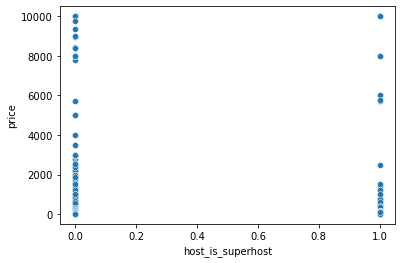

neighbourhood_cleansed


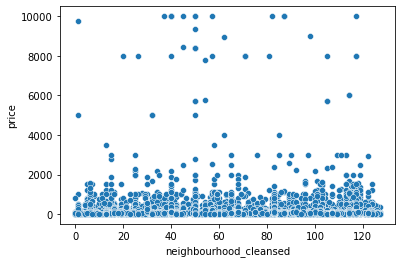

neighbourhood_group_cleansed


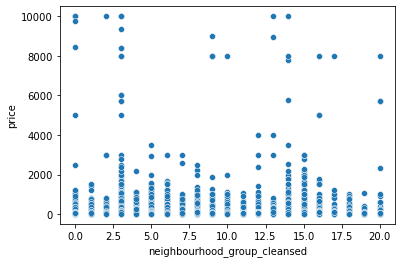

property_type


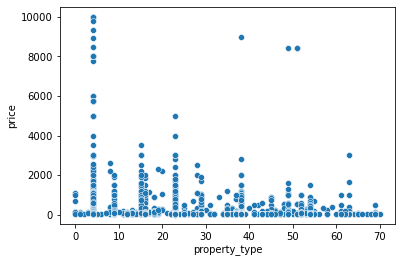

accommodates


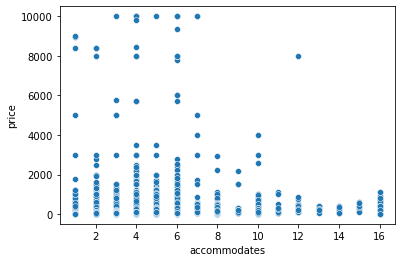

beds


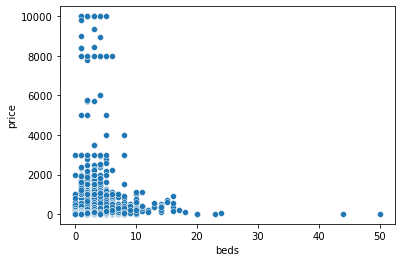

price


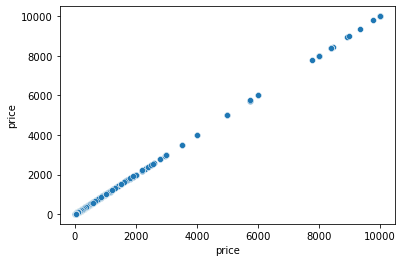

minimum_nights


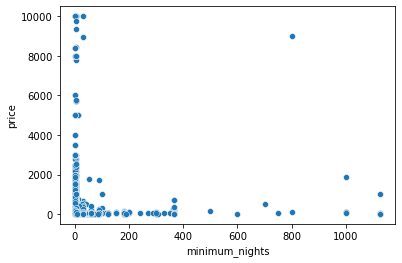

maximum_nights


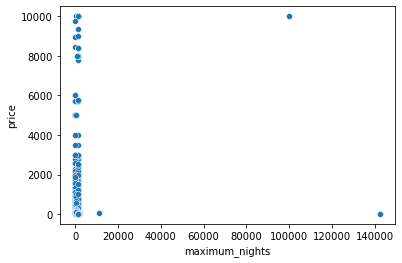

availability_30


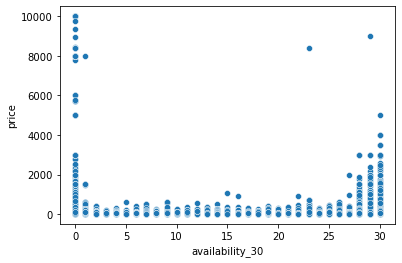

availability_365


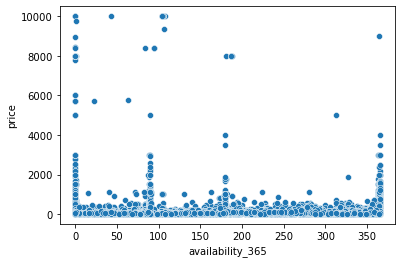

number_of_reviews


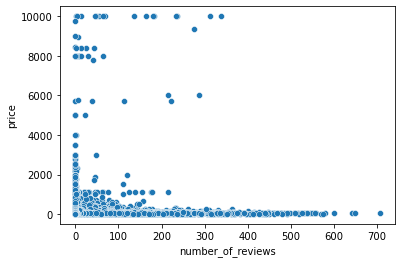

instant_bookable


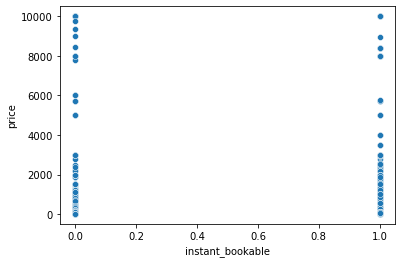

amenities


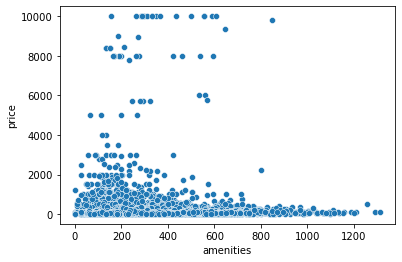

host_verifications


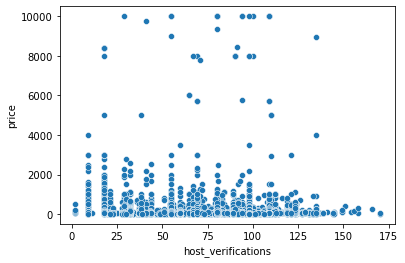

num_of_baths


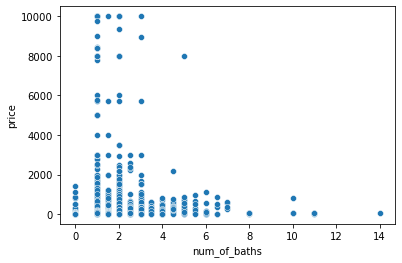

shared_bath


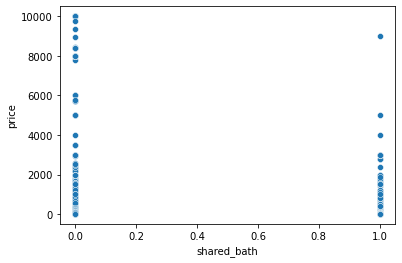

unknoun_bath


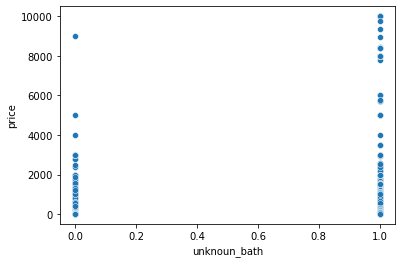

Hotel room


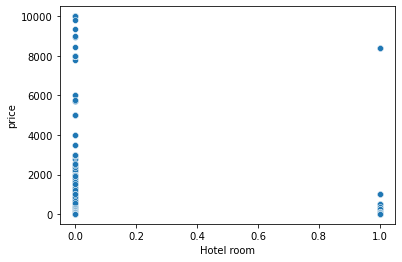

Private room


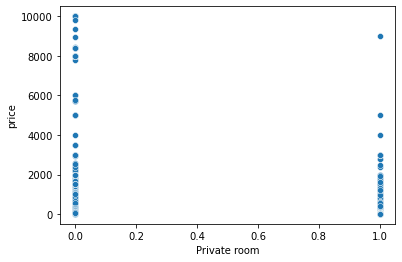

Shared room


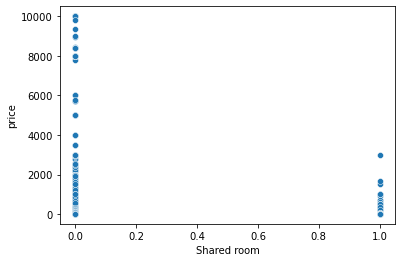

In [91]:
for i in df.columns:
    print(i)
    sns.scatterplot(x= df[i], y = df["price"])
    plt.show()

host_is_superhost


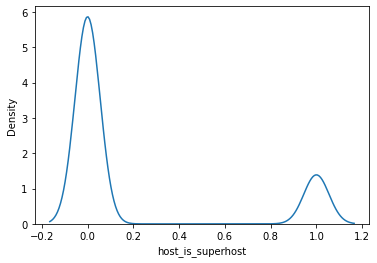

neighbourhood_cleansed


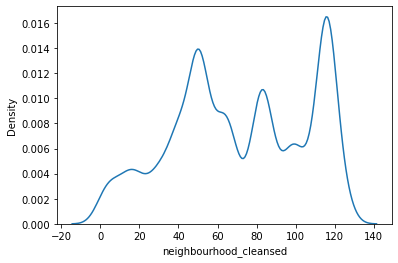

neighbourhood_group_cleansed


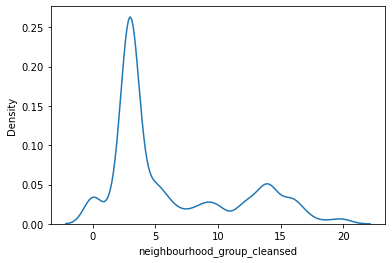

property_type


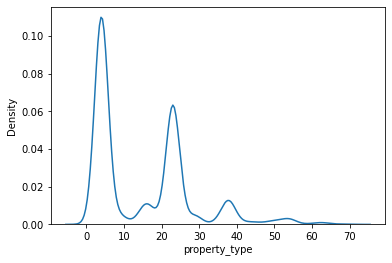

accommodates


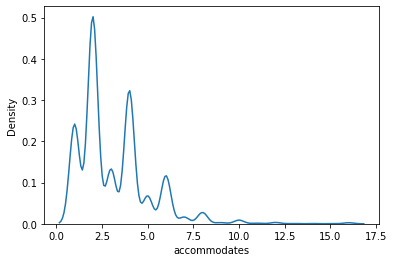

beds


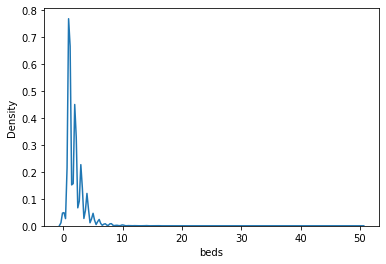

price


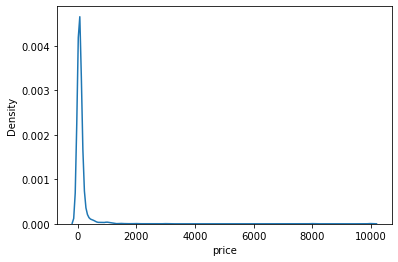

minimum_nights


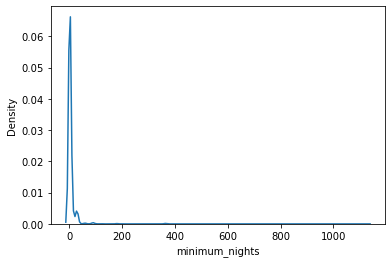

maximum_nights


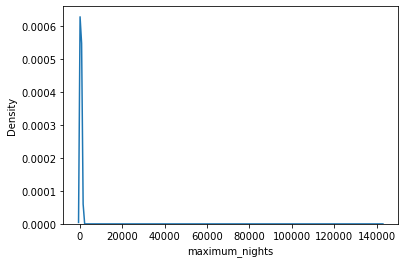

availability_30


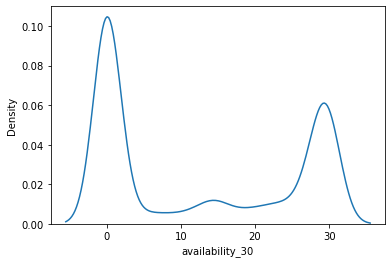

availability_365


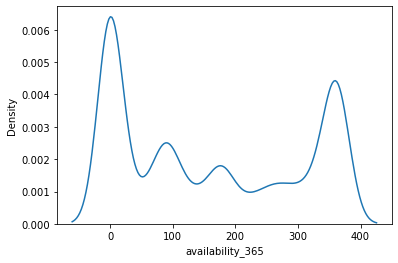

number_of_reviews


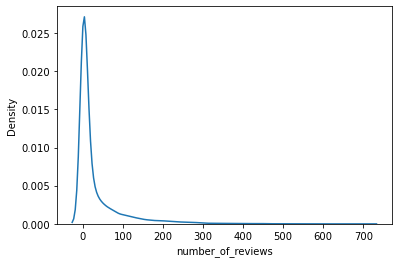

instant_bookable


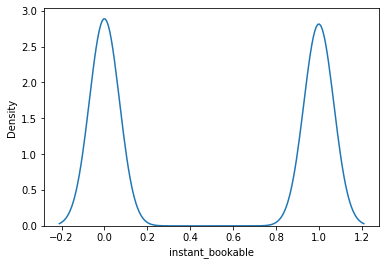

amenities


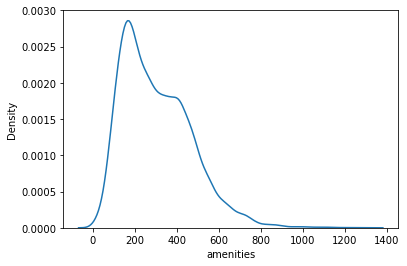

host_verifications


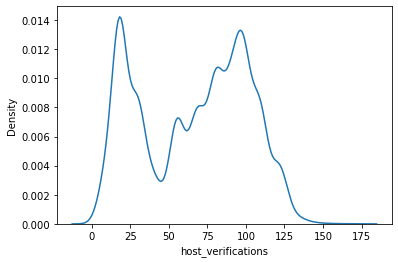

num_of_baths


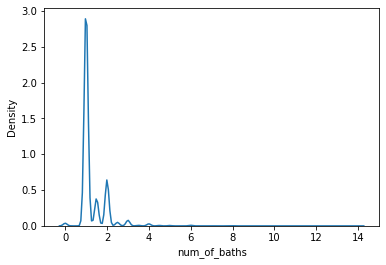

shared_bath


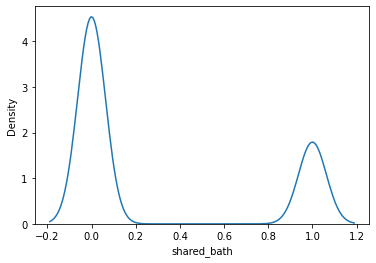

unknoun_bath


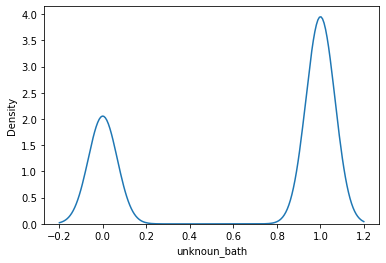

Hotel room


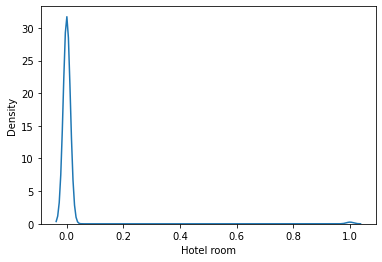

Private room


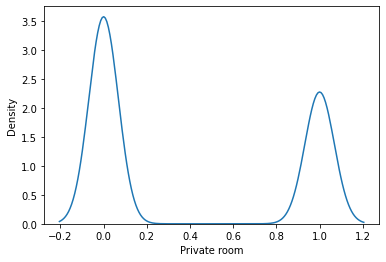

Shared room


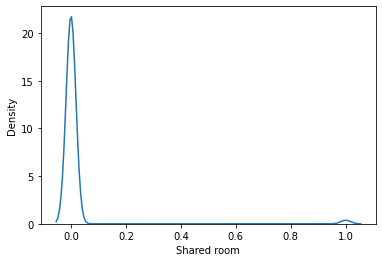

In [89]:
for i in df.columns:
    
    print(i)
    sns.kdeplot(df[i])
    plt.show()

In [50]:
df.shape

(18700, 21)

In [51]:
df = df[df["beds"]<15]

In [52]:
df.shape

(18686, 21)

In [53]:
df = df[df["accommodates"]<13]

In [54]:
df.shape

(18637, 21)

In [55]:
df = df[df["price"]<700]

In [56]:
df.shape

(18196, 21)

In [57]:
df = df[df["minimum_nights"]<150]

In [58]:
df.shape

(18110, 21)

In [59]:
df = df[df["maximum_nights"]<1500]

In [60]:
df.shape

(18105, 21)

In [61]:
df = df[df["number_of_reviews"]<500]

In [62]:
df.shape

(18082, 21)

In [63]:
df = df[df["amenities"]<1200]

In [64]:
df.shape

(18078, 21)

In [65]:
df = df[df["host_verifications"]<160]

In [66]:
df.shape

(18075, 21)

In [67]:
df = df[df["num_of_baths"] < 7]

In [68]:
df.shape

(18060, 21)

host_is_superhost


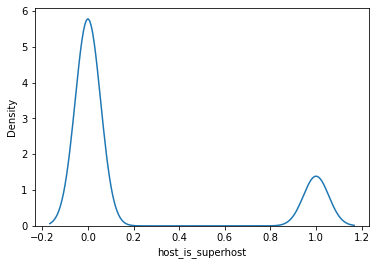

neighbourhood_cleansed


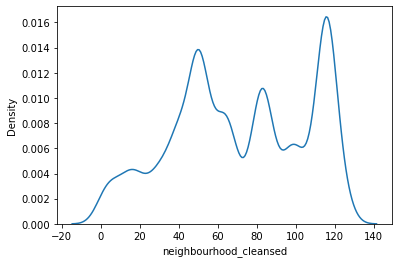

neighbourhood_group_cleansed


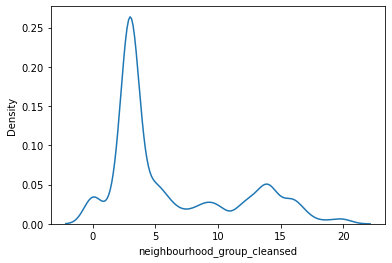

property_type


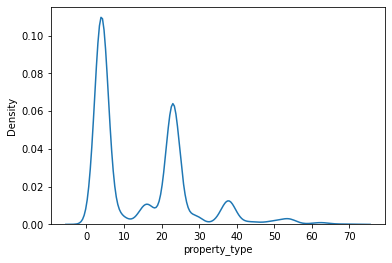

accommodates


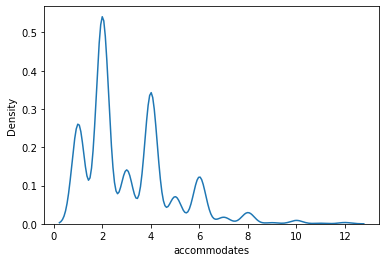

beds


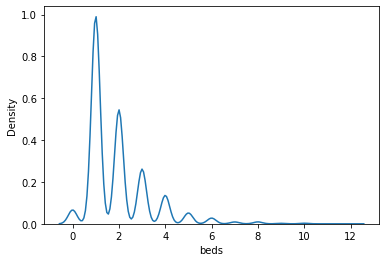

price


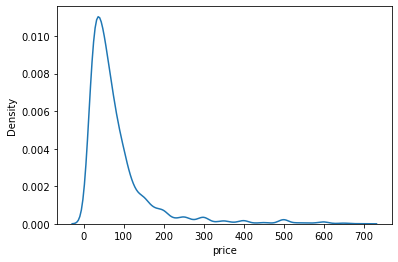

minimum_nights


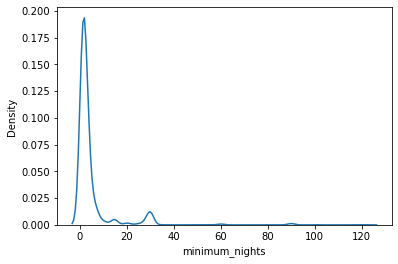

maximum_nights


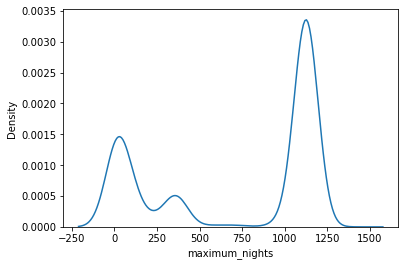

availability_30


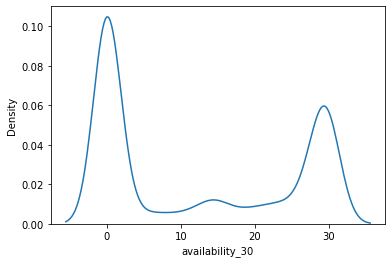

availability_365


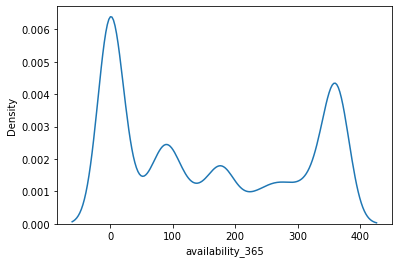

number_of_reviews


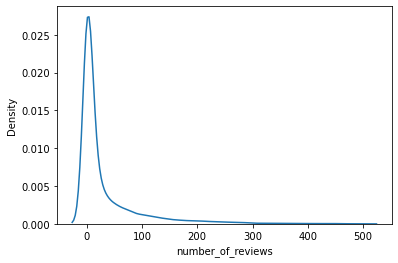

instant_bookable


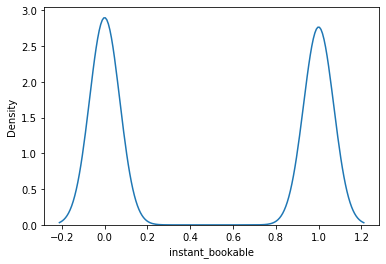

amenities


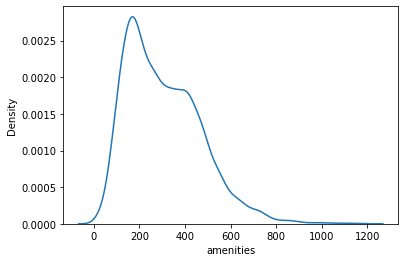

host_verifications


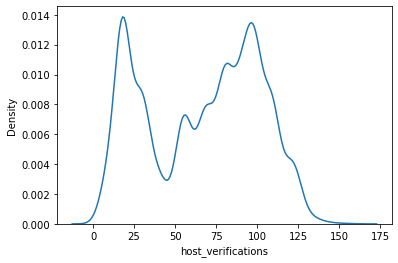

num_of_baths


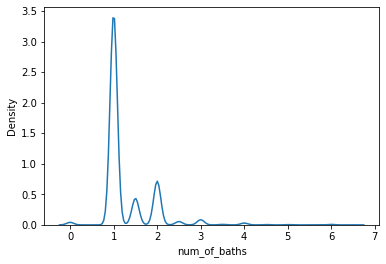

shared_bath


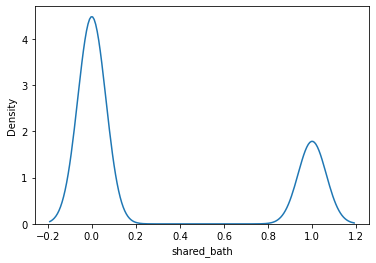

unknoun_bath


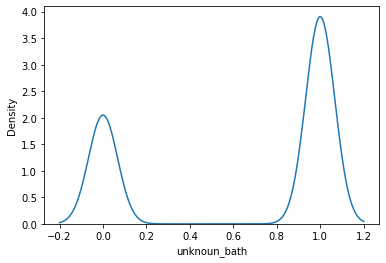

Hotel room


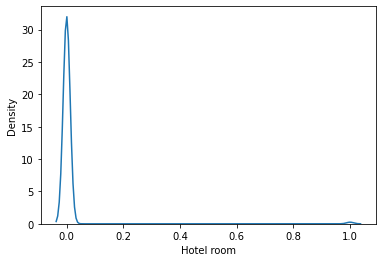

Private room


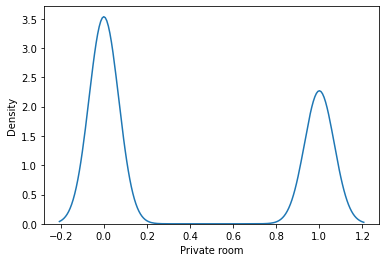

Shared room


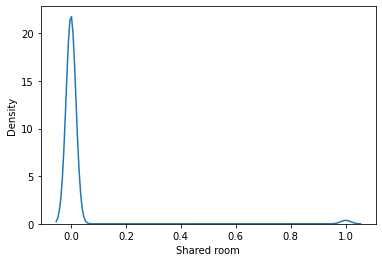

In [69]:
for i in df.columns:
    
    print(i)
    sns.kdeplot(df[i])
    plt.show()

In [70]:
X = df.drop("price", axis = 1)
y = df[["price"]]


In [71]:
# Vamos a Normalizar o Estandarizar los datos.

# Vamos a utilizar un escalador para "X" y uno para "y".

from sklearn.preprocessing import MinMaxScaler

# Normalizacion de X
scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)


# Normalizacion de y
scaler_y = MinMaxScaler()
scaler_y.fit(y)
y = scaler_y.transform(y)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(f"Train data: {X_train.shape, y_train.shape}")
print(f"Test data: {X_test.shape, y_test.shape}")

Train data: ((14448, 20), (14448, 1))
Test data: ((3612, 20), (3612, 1))


In [73]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [[-2.60703812e-03 -1.99657815e-04  1.90874361e-02  3.28712870e-02
   2.00374265e-01  6.67981091e-02 -7.01762395e-02 -9.65620854e-03
   3.26901579e-02 -4.08106603e-03 -9.51633177e-02  1.85518390e-02
  -9.84924961e-02 -4.24290233e-02  1.71947526e-01 -3.13494248e-02
  -3.72075584e-02  2.87557718e-02 -5.21412626e-02 -1.15556793e-01]]
w_0: [0.10671203]


In [98]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:[0.13959592] 	Valor real:[0.07423581]
Predicción:[0.1824353] 	Valor real:[0.2125182]
Predicción:[0.17767485] 	Valor real:[0.27947598]
Predicción:[0.20237198] 	Valor real:[0.16885007]
Predicción:[0.06549312] 	Valor real:[0.03202329]


In [75]:
# Sklearn tiene las formulas de algunas métricas en funciones.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [77]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 0.06321861950430374
MSE:	 0.011338530664598983
R**2:	 -2.3687541106552503
RAE:	 0.857312084518063
RSE:	 0.8019119318818991
Adjusted R**2:	 0.19362183625019835


In [78]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
2811,0.126638,0.126680,0.0338
698,0.208151,0.208513,0.1738
1135,0.128093,0.128320,0.1772
1758,0.043668,0.043758,0.2050
3103,0.136827,0.136405,0.3084
674,0.078603,0.078354,0.3157
702,0.085881,0.086164,0.3304
1525,0.046579,0.046736,0.3360
2044,0.206696,0.205863,0.4027
2600,0.147016,0.147622,0.4122


In [79]:
df_pred.tail(20)

,y_test,yhat,diferencia
722,0.008734,0.154117,1664.6416
2258,0.004367,0.078659,1701.2982
2819,0.002911,0.054144,1759.8349
1833,0.002911,0.054422,1769.3905
328,0.008734,0.164868,1787.7387
251,0.004367,0.083184,1804.9139
3158,0.004367,0.089360,1946.3499
3582,0.004367,0.089360,1946.3499
3426,0.002911,0.060609,1981.9083
882,0.001456,-0.028564,2062.3440


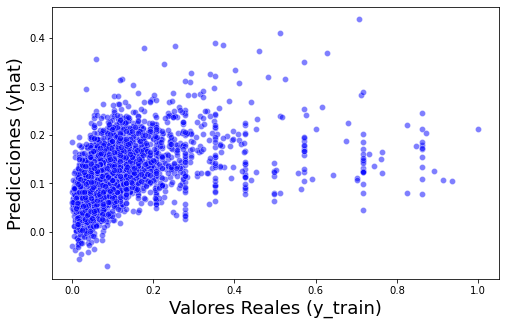

In [80]:
# Vamos a comparar que tan alejados estan los valores reales (y_test) y los valores predichos (y_train)

plt.figure(figsize = (8, 5))

sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

In [99]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = scaler_y.inverse_transform(y_test).flatten()
df_pred["yhat"] = scaler_y.inverse_transform(yhat).flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
3086,95.0,95.029423,0.0310
3589,35.0,35.037332,0.1067
532,38.0,38.061485,0.1618
2292,102.0,101.769319,0.2262
885,81.0,81.221838,0.2739
1006,89.0,88.755471,0.2748
2682,66.0,65.804588,0.2961
1958,130.0,129.487312,0.3944
1180,56.0,55.778013,0.3964
1860,89.0,88.638300,0.4064


In [100]:
df_pred.tail(20)

,y_test,yhat,diferencia
3559,18.0,98.981853,449.8992
311,20.0,111.669812,458.3491
1222,10.0,56.085626,460.8563
2440,31.0,175.430010,465.9033
412,14.0,79.311561,466.5112
1475,15.0,86.018963,473.4598
2808,16.0,96.222672,501.3917
2822,16.0,98.352983,514.7061
2151,13.0,80.998737,523.0672
2607,14.0,87.930971,528.0784


In [94]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {i[0]} \tValor real: {j[0]}")

Predicción: 0.1395959170956743 	Valor real: 0.07423580786026202
Predicción: 0.18243529875808412 	Valor real: 0.21251819505094616
Predicción: 0.17767484645725135 	Valor real: 0.27947598253275113
Predicción: 0.20237198017448244 	Valor real: 0.1688500727802038
Predicción: 0.06549311652151721 	Valor real: 0.03202328966521106


# Mapa

In [9]:
df.columns

Index(['host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'accommodates', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_365', 'number_of_reviews', 'instant_bookable',
       'amenities', 'host_verifications', 'num_of_baths', 'shared_bath',
       'unknoun_bath', 'Hotel room', 'Private room', 'Shared room'],
      dtype='object')

In [10]:
df['neighbourhood_group_cleansed'].unique()

array([ 4,  9,  0,  3, 14,  7, 12,  6,  5, 20,  8, 10,  2, 16, 13, 15, 19,
        1, 17, 18, 11])

In [11]:
with open("neighbourhoods.geojson", "r") as file:
    
    geojson = file.read()
    
pprint(geojson)

In [12]:
df_map = df.groupby('neighbourhood_group_cleansed', as_index=False).mean()
df_map

In [13]:
df_map = df_map[df_map["price"]<200]

In [14]:
df_map

In [15]:
sns.histplot(df_map["price"])

In [16]:
world_map = folium.Map(location = [40.18893909782826, -3.938873736090105], zoom_start =12)

folium.Choropleth(geo_data     = geojson,
                  data         = df_map,
                  columns      = ["neighbourhood_group_cleansed", "price"],
                  key_on       = "feature.properties.neighbourhood_group",
                  fill_color   = "Blues_r", 
                  fill_opacity = 0.7, 
                  line_opacity = 0.2,
                  legend_name  = "Precio airbnb",
                  bins         = 253,
                  highlight    = True).add_to(world_map)

world_map

In [17]:
df_class = df["price"].copy()

In [18]:
df.drop("price", axis = 1, inplace = True)

In [19]:
X = np.asarray(df)
y = np.asarray(df_class)

In [20]:
X.shape, y.shape

((18700, 20), (18700,))

In [101]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 250,
                              random_state = 0)

forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df.columns[f]))

# Plot the feature importances of the forest
plt.figure()

plt.title("Feature importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", yerr = std[indices], align = "center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

/tmp/ipykernel_3851/433595508.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X, y)


ValueError: Unknown label type: 'continuous'